# Clasificación de Pacientes con Riesgo Cardiovascular usando RNS
## Por: 
## Santiago Andrés Rocha, Sebastián Rojas Bueno

## Manejo de datos, uso de Dataset "Heart Attack Analysis & Prediction Dataset" 
https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [ ]:
#Importaciones necesarias para la realización del laboratorio
import numpy as np
import math
from numpy.random import randint
from numpy import linspace
from matplotlib import pyplot

#Red Neuronal con Keras
import pandas as pd
import tensorflow as tf
from tensorflow import keras

#Directamente para el modelo
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
filename = 'heart.csv'
data = pd.read_csv(filename, header=0, encoding='latin-1')

print(data.shape)
data.head(11)

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
1,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
2,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
3,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
4,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
5,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
6,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
7,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
8,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
9,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0


###Preprocesamiento de los datos
Tomamos todas las columnas de la tabla, y eliminamos las filas que no posean datos o que tengan algún espacio vacío

In [ ]:
data = data.dropna()
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
1,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
2,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
3,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
4,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
299,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
300,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
301,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


#### Uso de datos:
* Con cuantos años de inflación predecimos cuántos años?
    * Con las 13 columnas de síntomas y características, 
    clasificamos si es propenso a un ataque al corazón o no.
    
| Datos | % | Filas del Dataset |
|:---------:|:---------:|:---------:|
| Entrenamiento | 60% | 182 |
| Validación | 30% | 91 |
| Test | 10% | 30 |

In [ ]:
# Separación de los datos según su función

# Entrenamiento 
heartTrain = data.iloc[:182,:].copy()
xTrain = heartTrain.iloc[:, :13]
yTrain = heartTrain.iloc[:, 13:14]

# Validación
heartVal = data.iloc[182:273,:].copy()
xValid = heartVal.iloc[:, :13]
yValid = heartVal.iloc[:, 13:14]

# Test
heartTest = data.iloc[273:303,:].copy()
xTest = heartTest.iloc[:, :13]
yTest = heartTest.iloc[:, 13:14]

### Datos de Entrenamiento

In [ ]:
xTrain

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,57,0,0,140,241,0,1,123,1,0.2,1,0,3
1,45,1,3,110,264,0,1,132,0,1.2,1,0,3
2,56,1,1,120,236,0,1,178,0,0.8,2,0,2
3,57,0,0,120,354,0,1,163,1,0.6,2,0,2
4,46,1,2,150,231,0,1,147,0,3.6,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,71,0,1,160,302,0,1,162,0,0.4,2,2,2
178,56,1,2,130,256,1,0,142,1,0.6,1,1,1
179,48,1,1,110,229,0,1,168,0,1.0,0,0,3
180,57,1,2,150,126,1,1,173,0,0.2,2,1,3


In [ ]:
yTrain

,output
0,0
1,0
2,1
3,1
4,0
...,...
177,1
178,0
179,0
180,1


### Datos de Validación

In [ ]:
xValid

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
182,60,1,0,117,230,1,1,160,1,1.4,2,2,3
183,64,1,2,140,335,0,1,158,0,0.0,2,0,2
184,43,1,0,120,177,0,0,120,1,2.5,1,0,3
185,62,1,1,128,208,1,0,140,0,0.0,2,0,2
186,55,1,0,132,353,0,1,132,1,1.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3
271,67,1,0,120,237,0,1,71,0,1.0,1,0,2


In [ ]:
yValid

,output
182,0
183,0
184,0
185,1
186,0
...,...
268,0
269,0
270,0
271,0


### Datos de Prueba

In [ ]:
xTest

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
273,47,1,0,110,275,0,0,118,1,1.0,1,1,2
274,52,1,0,125,212,0,1,168,0,1.0,2,2,3
275,58,1,0,146,218,0,1,105,0,2.0,1,1,3
276,59,1,3,178,270,0,0,145,0,4.2,0,0,3
277,58,0,1,136,319,1,0,152,0,0.0,2,2,2
278,61,1,0,138,166,0,0,125,1,3.6,1,1,2
279,42,1,0,136,315,0,1,125,1,1.8,1,0,1
280,41,0,1,130,204,0,0,172,0,1.4,2,0,2
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1


In [ ]:
yTest

,output
273,0
274,0
275,0
276,1
277,0
278,0
279,0
280,1
281,0
282,0


## Red Neuronal
* Para problemas de clasificación:
   * Tener como función de activación en capa de salida la función Softmax
   * Tener como función costo la función Cross Entropy

In [ ]:
# Dense = Capa que se conecta con todas las neuronas de la siguiente capa

# Modelo de 13 entradas, 11 neuronas en primera capa oculta, 
# con función de activación Relu
oculta1 = Dense(units=11, input_shape=[13], activation='relu')

# 9 neuronas en segunda capa oculta, 
# con función de activación Relu
oculta2 = Dense(9, activation='relu')

# 5 neuronas en tercera capa oculta, 
# con función de activación Relu
oculta3 = Dense(5, activation='relu')

# 3 neuronas en cuarta capa oculta, 
# con función de activación Relu
oculta4 = Dense(3, activation='relu')

# 1 neurona en capa de salida, 
# con función de activación Sigmoid
salida = Dense(1, activation='sigmoid')

model = Sequential([oculta1, oculta2, oculta3, oculta4, salida])

In [ ]:
# Compilamos el modelo, con función de Costo de
#Cross Entropy, optimizador 'adam' 
# y con métrica de Precisión

#Adam, para aprender pesos y sesgos de forma eficiente

bce = tf.keras.losses.BinaryCrossentropy()
model.compile(loss=bce, optimizer='adam', metrics=['accuracy'])

# Entrenamiento y Validación
history = model.fit(xTrain, yTrain, epochs=500, verbose=False, validation_data=(xValid, yValid))
print("Entrenamiento completado!")

Entrenamiento completado!


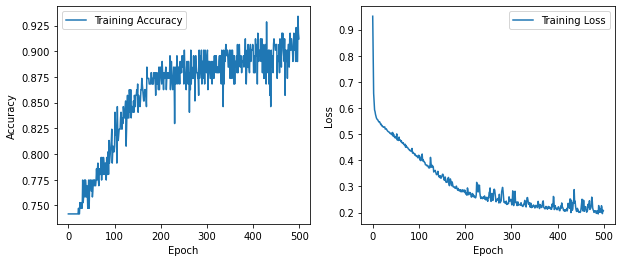

In [ ]:
# Evaluación
fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].plot(history.history['accuracy'], label='Training Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(history.history['loss'], label='Training Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()


In [ ]:
#fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(10,4))
#ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
#ax[0].set_xlabel('Epoch')
#ax[0].set_ylabel('Accuracy')
#ax[0].legend()

#ax[1].plot(history.history['val_loss'], label='Validation Loss')
#ax[1].set_xlabel('Epoch')
#ax[1].set_ylabel('Loss')
#ax[1].legend()

In [ ]:
# Test
testResult = model.predict(xTest, verbose=False)
#testResult

In [ ]:
xVal = []
for i in range(273, 303):
  xVal.append(i)
yTestArr = np.array(yTest)

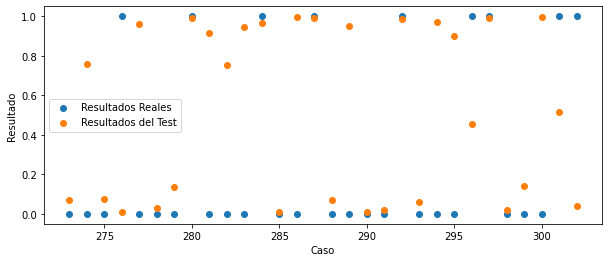

In [ ]:
fig, ax = pyplot.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.scatter(xVal, yTestArr, label='Resultados Reales')
ax.set_xlabel('Caso')
ax.set_ylabel('Resultado')
ax.legend()

ax.scatter(xVal, testResult, label='Resultados del Test')
ax.set_xlabel('Caso')
ax.set_ylabel('Resultado')
ax.legend()

#### Análisis de datos: ¿Probabilidad de Sufrir?
Si los resultados sobrepasan el 65%, diremos que SI son propensos a sufrir ataques cardíacos. De lo contario, diremos que NO son propensos.


In [ ]:
testResultAdjust = []
for result in testResult:
  if result > 0.65:
    testResultAdjust.append(1)
  else:
    testResultAdjust.append(0)

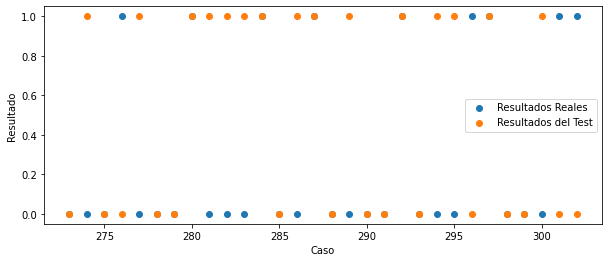

In [ ]:
fig, ax = pyplot.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.scatter(xVal, yTestArr, label='Resultados Reales')
ax.set_xlabel('Caso')
ax.set_ylabel('Resultado')
ax.legend()

ax.scatter(xVal, testResultAdjust, label='Resultados del Test')
ax.set_xlabel('Caso')
ax.set_ylabel('Resultado')
ax.legend()

## Resumen de los Resultados:
* Resumen del modelo:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                154       
                                                                 
 dense_1 (Dense)             (None, 9)                 108       
                                                                 
 dense_2 (Dense)             (None, 5)                 50        
                                                                 
 dense_3 (Dense)             (None, 3)                 18        
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 334
Trainable params: 334
Non-trainable params: 0
_________________________________________________________________


### Loss:

In [ ]:
print(str(round(history.history['loss'][-1],3)))

0.207


### Precisión:

In [ ]:
print(str(round(history.history['accuracy'][-1]*100,3)) + "%")

91.209%


### Pesos y sesgos:  
  * Capa Oculta 1:
    * Pesos:

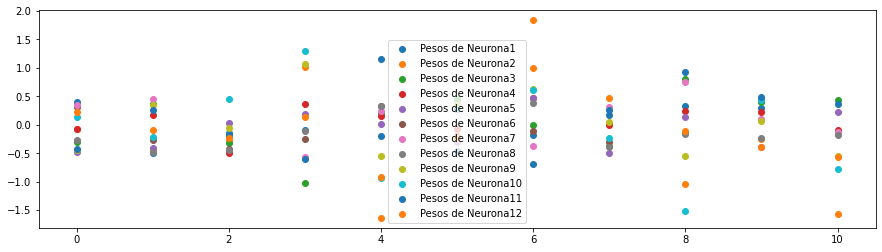

In [ ]:
a = oculta1.get_weights()[0]
xVals = []
for i in range(0,len(a[0])):
  xVals.append(i)
fig, ax = pyplot.subplots(nrows=1, ncols=1, figsize=(15,4))
for i in range(len(a[0])+1):
  ax.scatter(xVals, a[i], label='Pesos de Neurona' + str(i+1))
ax.legend()

* Capa Oculta 1:
  * Sesgos:

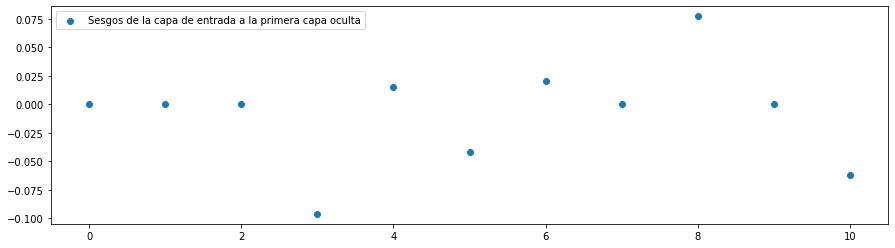

In [ ]:
b = oculta1.get_weights()[1]
fig, ax = pyplot.subplots(nrows=1, ncols=1, figsize=(15,4))
ax.scatter(xVals, b, label='Sesgos de la capa de entrada a la primera capa oculta')
ax.legend()

---
* Capa Oculta 2:
  * Pesos:

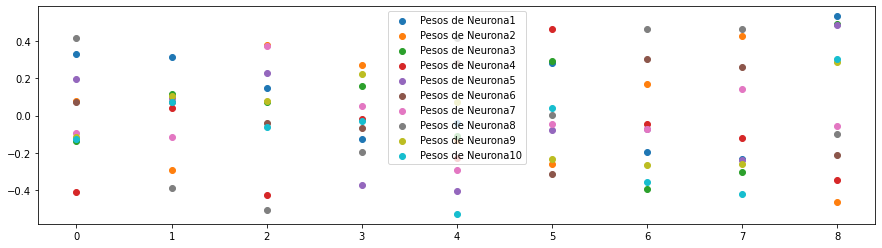

In [ ]:
a = oculta2.get_weights()[0]
xVals = []
for i in range(0,len(a[0])):
  xVals.append(i)
fig, ax = pyplot.subplots(nrows=1, ncols=1, figsize=(15,4))
for i in range(len(a[0])+1):
  ax.scatter(xVals, a[i], label='Pesos de Neurona' + str(i+1))
ax.legend()

* Capa Oculta 2:
  * Sesgos:

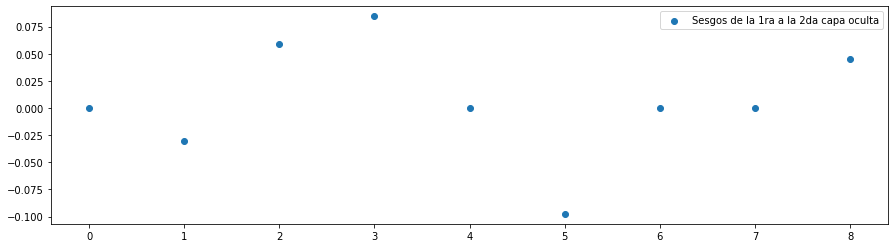

In [ ]:
b = oculta2.get_weights()[1]
fig, ax = pyplot.subplots(nrows=1, ncols=1, figsize=(15,4))
ax.scatter(xVals, b, label='Sesgos de la 1ra a la 2da capa oculta')
ax.legend()

---
* Capa Oculta 3:
  * Pesos:

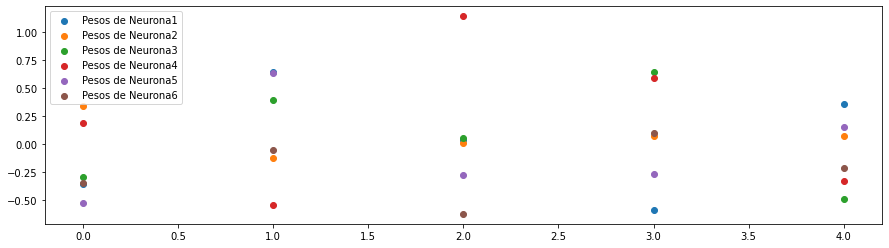

In [ ]:
a = oculta3.get_weights()[0]
xVals = []
for i in range(0,len(a[0])):
  xVals.append(i)
fig, ax = pyplot.subplots(nrows=1, ncols=1, figsize=(15,4))
for i in range(len(a[0])+1):
  ax.scatter(xVals, a[i], label='Pesos de Neurona' + str(i+1))
ax.legend()

* Capa Oculta 3:
  * Sesgos:

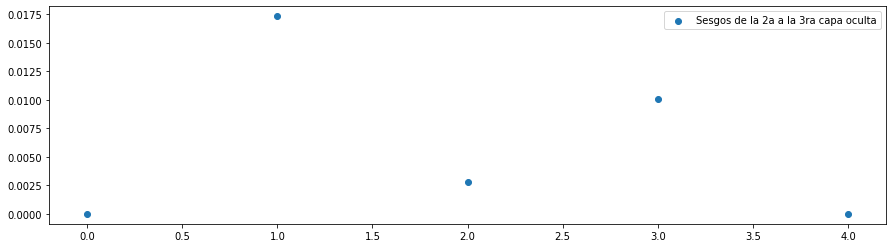

In [ ]:
b = oculta3.get_weights()[1]
fig, ax = pyplot.subplots(nrows=1, ncols=1, figsize=(15,4))
ax.scatter(xVals, b, label='Sesgos de la 2a a la 3ra capa oculta')
ax.legend()

---
* Capa Oculta 4:
  * Pesos:

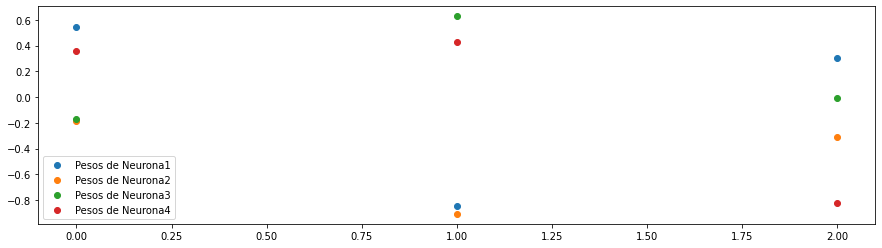

In [ ]:
a = oculta4.get_weights()[0]
xVals = []
for i in range(0,len(a[0])):
  xVals.append(i)
fig, ax = pyplot.subplots(nrows=1, ncols=1, figsize=(15,4))
for i in range(len(a[0])+1):
  ax.scatter(xVals, a[i], label='Pesos de Neurona' + str(i+1))
ax.legend()

* Capa Oculta 4:
  * Sesgos:

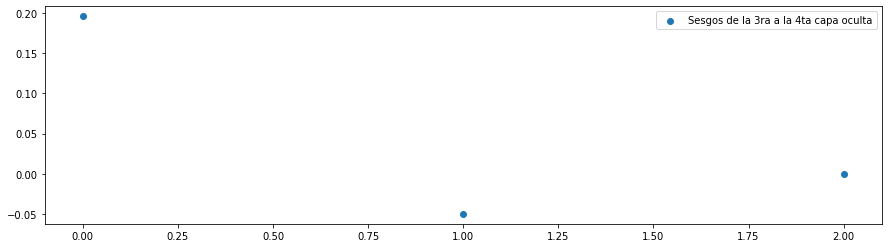

In [ ]:
b = oculta4.get_weights()[1]
fig, ax = pyplot.subplots(nrows=1, ncols=1, figsize=(15,4))
ax.scatter(xVals, b, label='Sesgos de la 3ra a la 4ta capa oculta')
ax.legend()